## Titanic EDA

---

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['figure.figsize'] = [6, 3]
plt.rcParams['figure.dpi'] = 80

In [3]:
# Import dataset

titanic = pd.read_csv('/Users/mareksturek/Documents/GitHub/data-visualization/data/titanic1.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Various examples with data preprocessing

In [5]:
cols = titanic.columns
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [8]:
plt.style.use('ggplot')

In [9]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

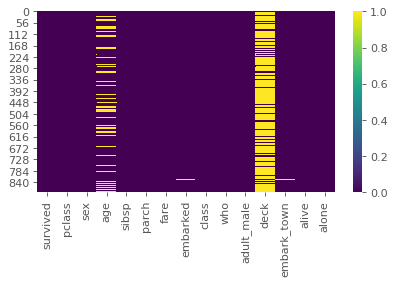

In [10]:
sns.heatmap(titanic.isnull(), cmap = 'viridis', cbar = True);

In [11]:
corrmat = titanic.corr()
corrmat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


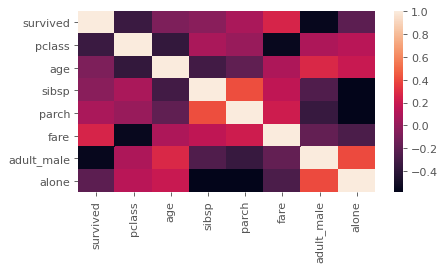

In [12]:
sns.heatmap(corrmat);

In [13]:
print(list(cols))

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


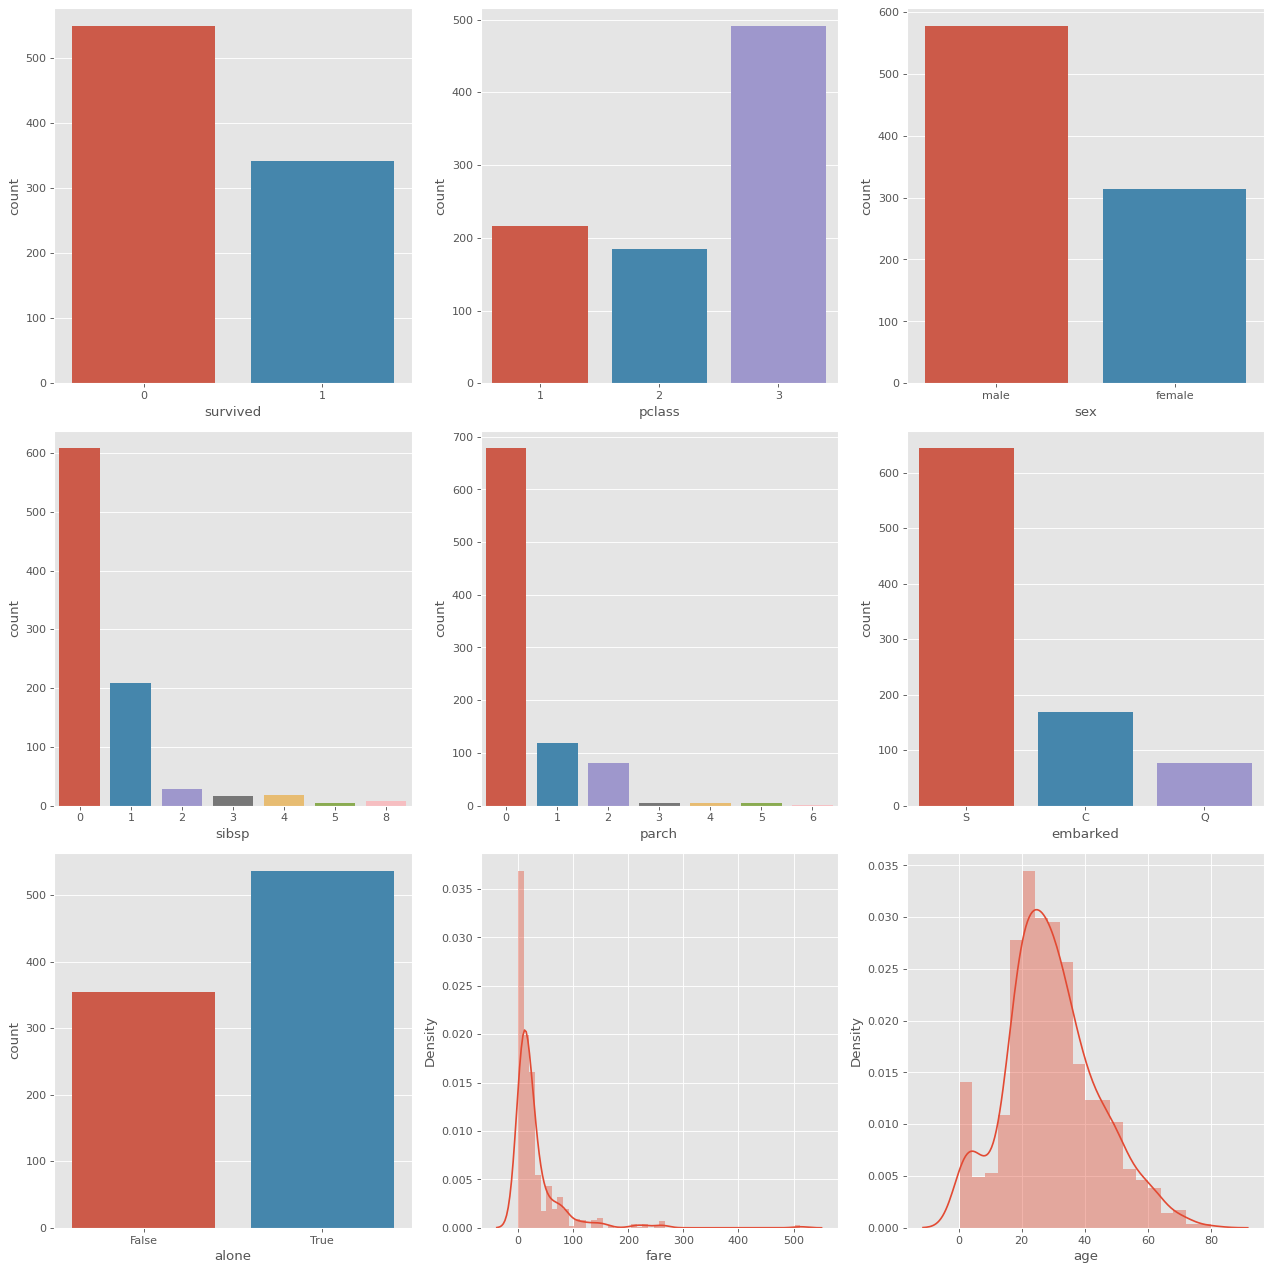

In [14]:
fig, ax = plt.subplots(3, 3, figsize = (16, 16))

sns.countplot('survived', data = titanic, ax = ax[0][0])
sns.countplot('pclass', data = titanic, ax = ax[0][1])
sns.countplot('sex', data = titanic, ax = ax[0][2])
sns.countplot('sibsp', data = titanic, ax = ax[1][0])
sns.countplot('parch', data = titanic, ax = ax[1][1])
sns.countplot('embarked', data = titanic, ax = ax[1][2])
sns.countplot('alone', data = titanic, ax = ax[2][0])

sns.distplot(titanic['fare'], kde = True, ax = ax[2][1])
sns.distplot(titanic['age'], kde = True, ax = ax[2][2])

plt.tight_layout()

In [15]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

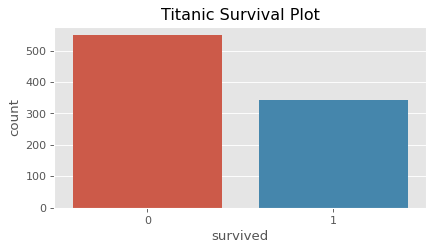

In [16]:
sns.countplot('survived', data = titanic)
plt.title('Titanic Survival Plot')
plt.show()

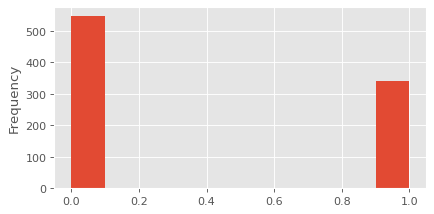

In [17]:
titanic['survived'].plot.hist();

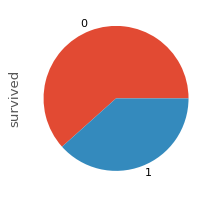

In [18]:
titanic['survived'].value_counts().plot.pie();

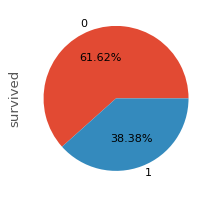

In [19]:
titanic['survived'].value_counts().plot.pie(autopct = '%1.2f%%');

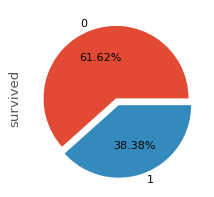

In [20]:
explode = [0, 0.1]
titanic['survived'].value_counts().plot.pie(explode = explode, autopct = '%1.2f%%');

In [21]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [22]:
titanic.groupby(['pclass', 'survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

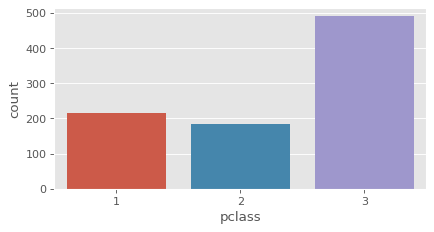

In [23]:
sns.countplot('pclass', data = titanic);

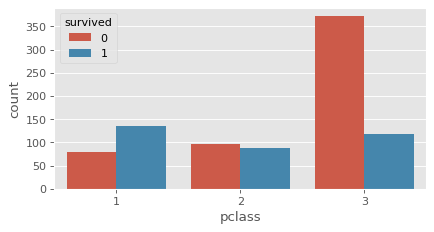

In [24]:
sns.countplot('pclass', data = titanic, hue = 'survived');

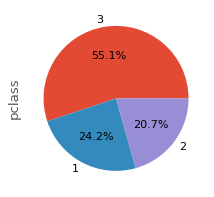

In [25]:
titanic['pclass'].value_counts().plot.pie(autopct = "%1.1f%%");

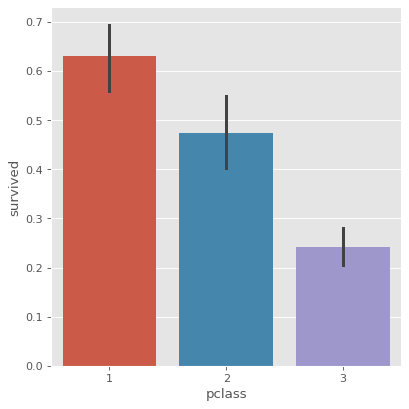

In [26]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'bar', data = titanic);

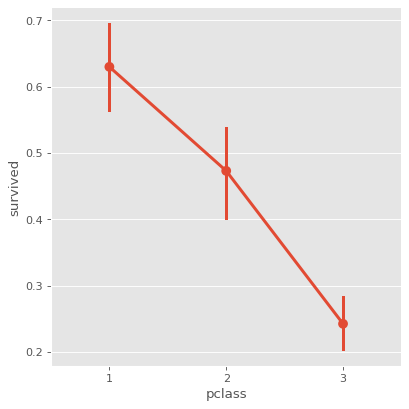

In [27]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'point', data = titanic);

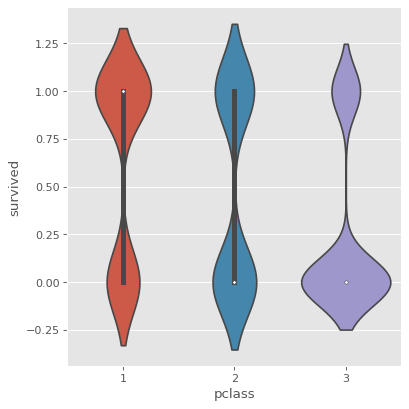

In [28]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'violin', data= titanic);

In [29]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [30]:
titanic.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

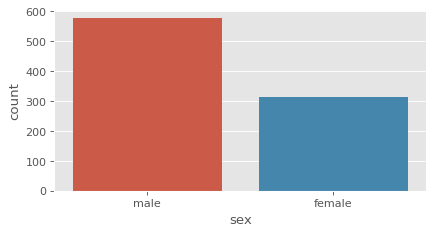

In [31]:
sns.countplot('sex', data = titanic);

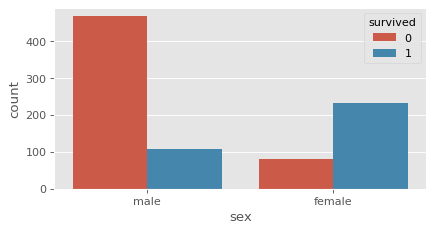

In [32]:
sns.countplot('sex', data = titanic, hue = 'survived');

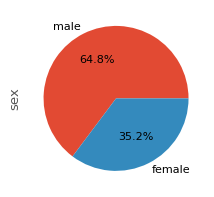

In [33]:
titanic['sex'].value_counts().plot.pie(autopct = '%1.1f%%');

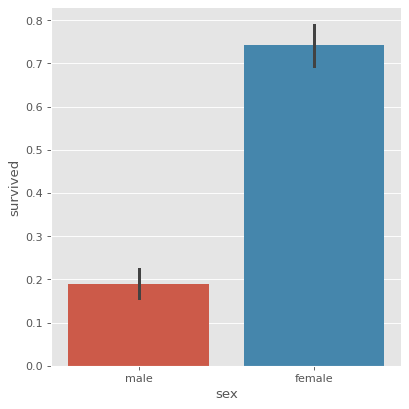

In [34]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic);

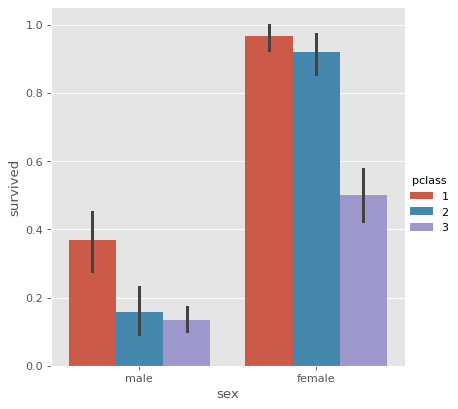

In [35]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, hue = 'pclass');

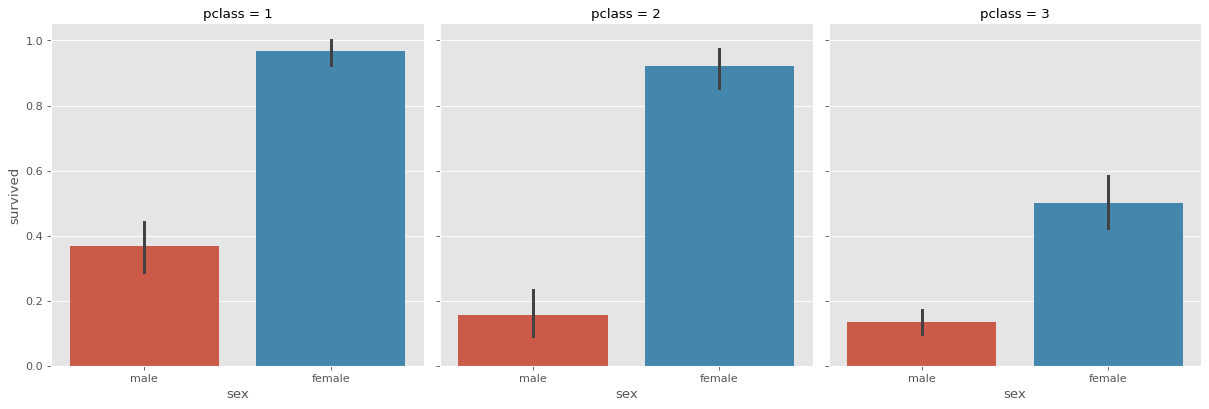

In [36]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, col = 'pclass');

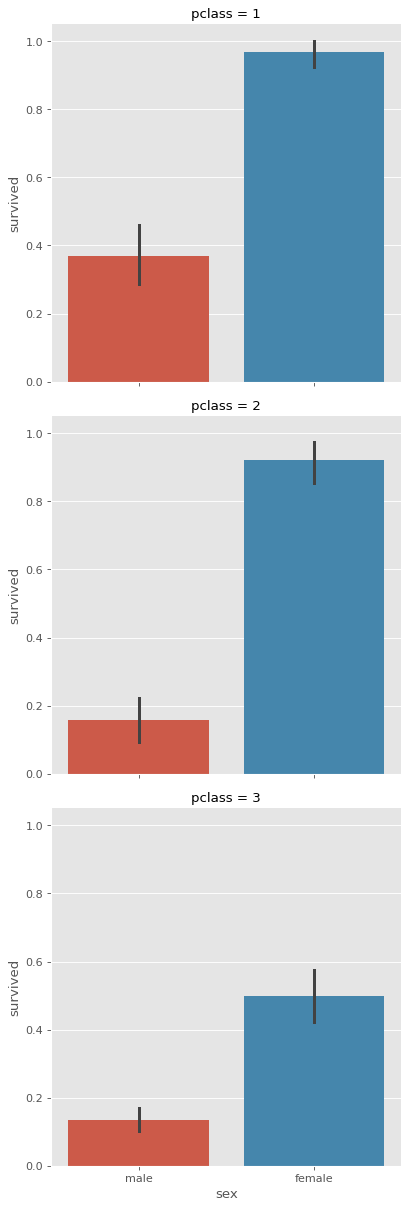

In [37]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, row = 'pclass');

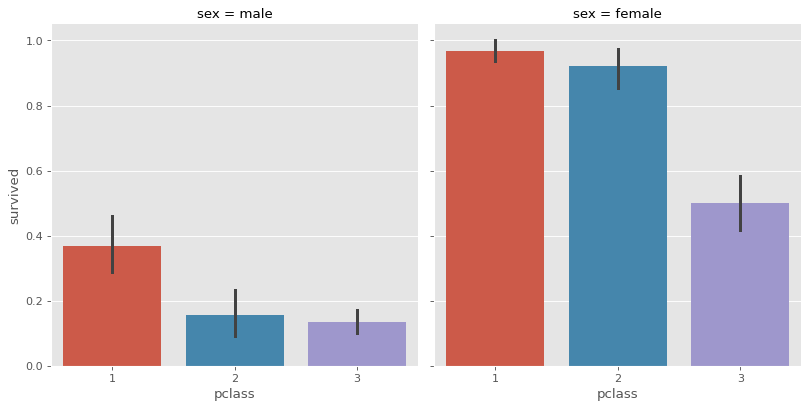

In [38]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'bar', data = titanic, col = 'sex');

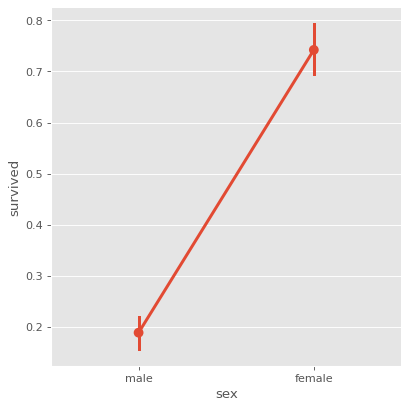

In [39]:
sns.catplot(x = 'sex', y = 'survived', kind = 'point', data = titanic);

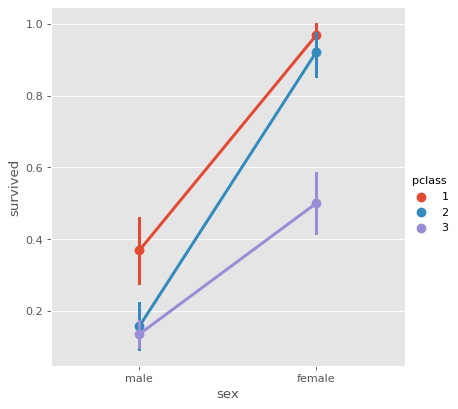

In [40]:
sns.catplot(x = 'sex', y = 'survived', kind = 'point', data = titanic, hue = 'pclass');

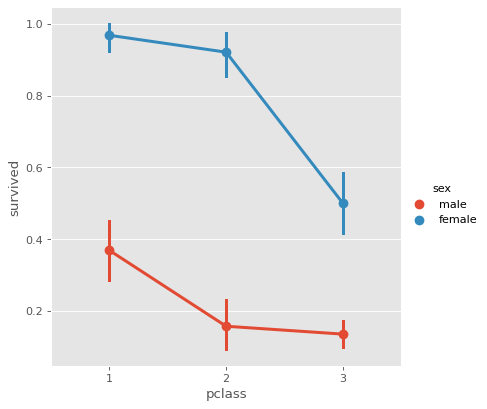

In [41]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'point', data = titanic, hue = 'sex');

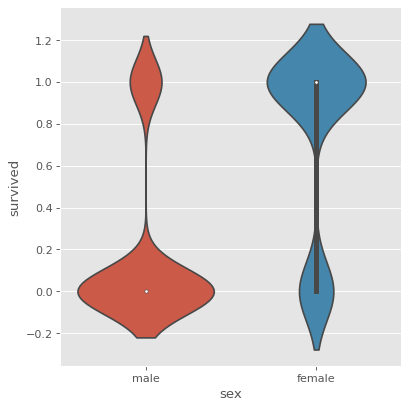

In [42]:
sns.catplot(x = 'sex', y = 'survived', kind = 'violin', data = titanic);

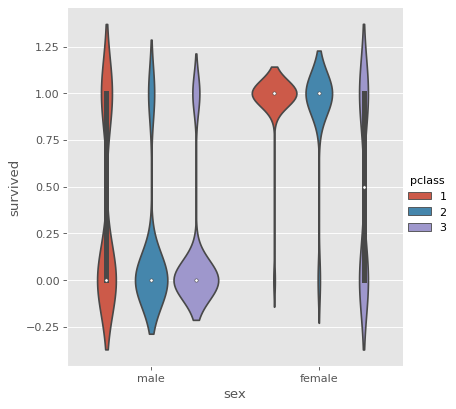

In [43]:
sns.catplot(x = 'sex', y = 'survived', kind = 'violin', data = titanic, hue = 'pclass');

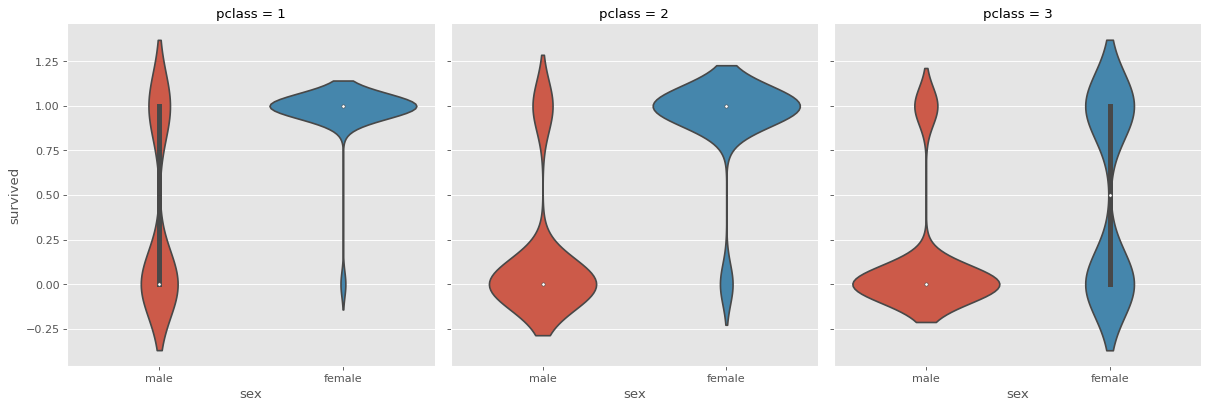

In [44]:
sns.catplot(x = 'sex', y = 'survived', kind = 'violin', data = titanic, col = 'pclass');

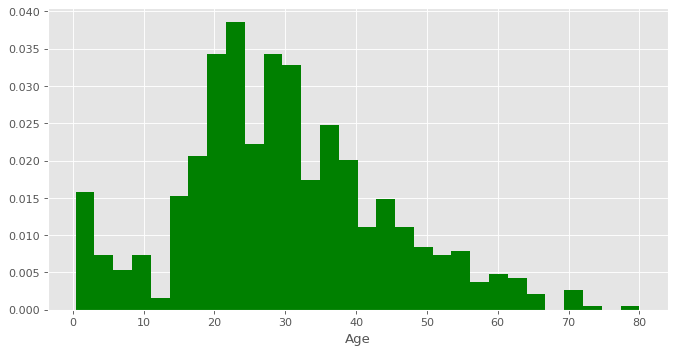

In [45]:
titanic['age'].hist(bins = 30, density = True, color = 'green', figsize = (10, 5))
plt.xlabel('Age')
plt.show()

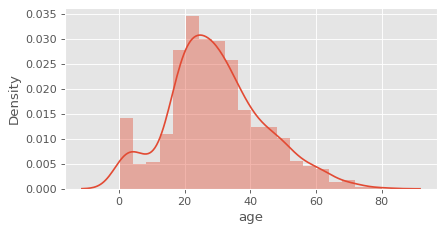

In [46]:
sns.distplot(titanic['age']);

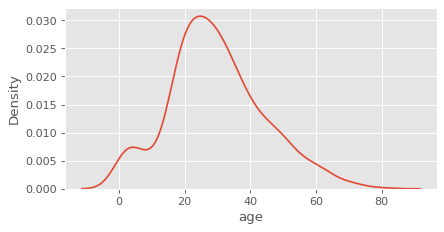

In [47]:
sns.distplot(titanic['age'], hist = False);

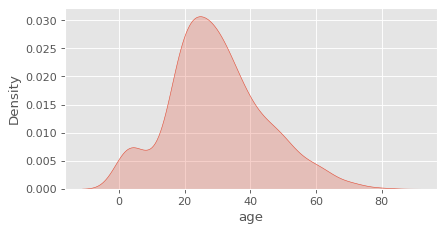

In [48]:
sns.kdeplot(titanic['age'], shade = True);

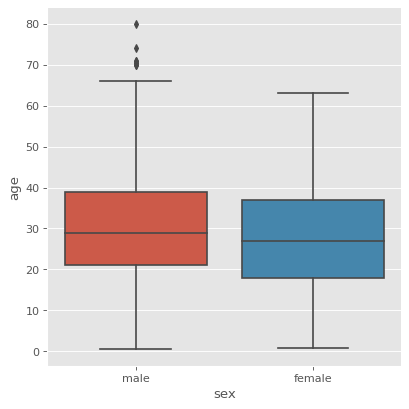

In [49]:
sns.catplot(x = 'sex', y = 'age', data = titanic, kind = 'box');

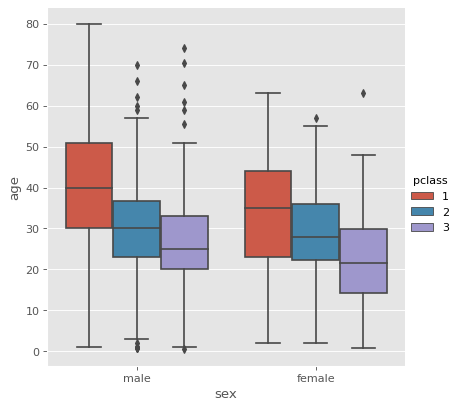

In [50]:
sns.catplot(x = 'sex', y = 'age', data = titanic, kind = 'box', hue = 'pclass');

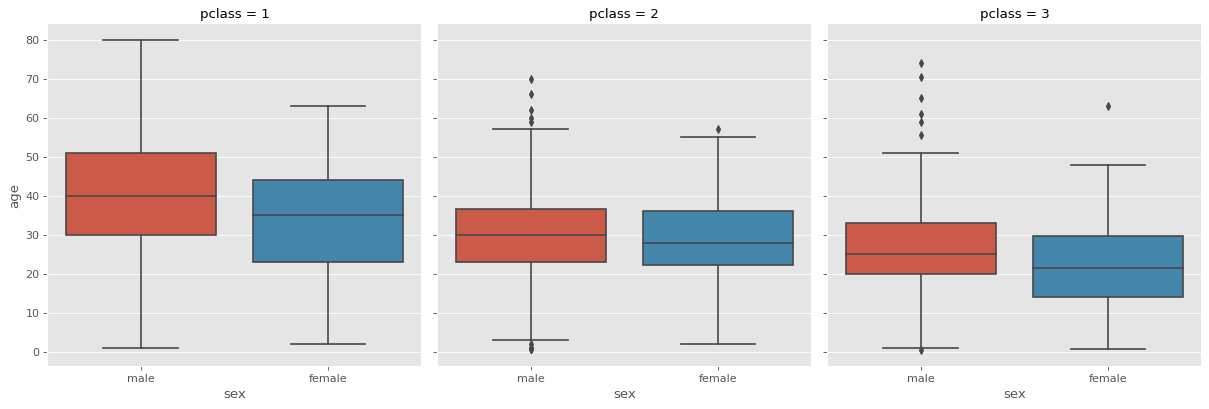

In [51]:
sns.catplot(x = 'sex', y = 'age', data = titanic, kind = 'box', col = 'pclass');

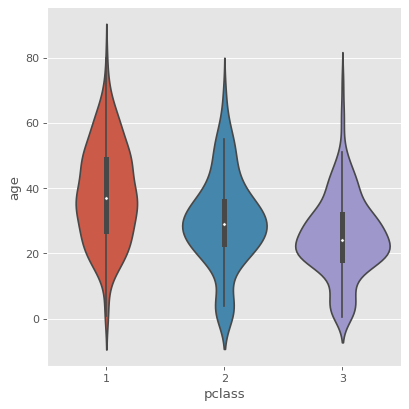

In [52]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'violin');

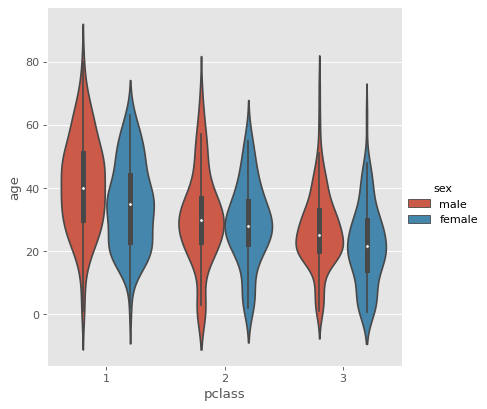

In [53]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'violin', hue = 'sex');

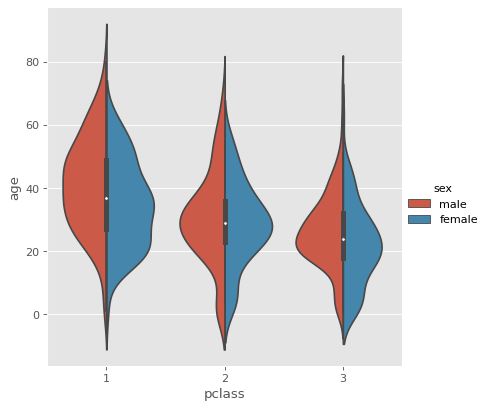

In [54]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'violin', hue = 'sex', split = True);

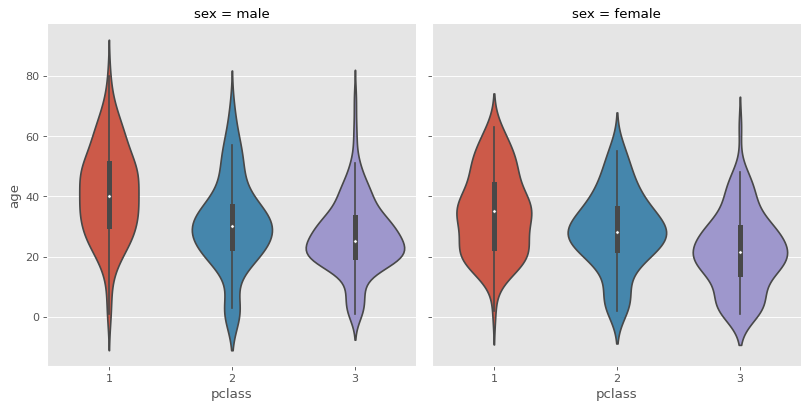

In [55]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'violin', col = 'sex');

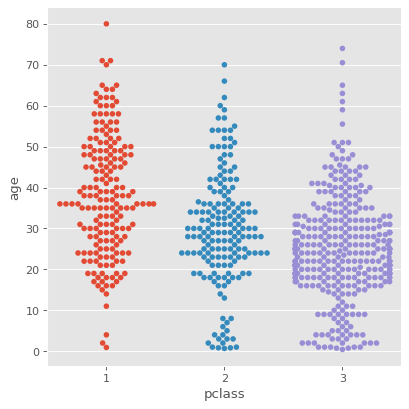

In [56]:
sns.catplot(x = 'pclass', y = 'age', kind = 'swarm', data = titanic);

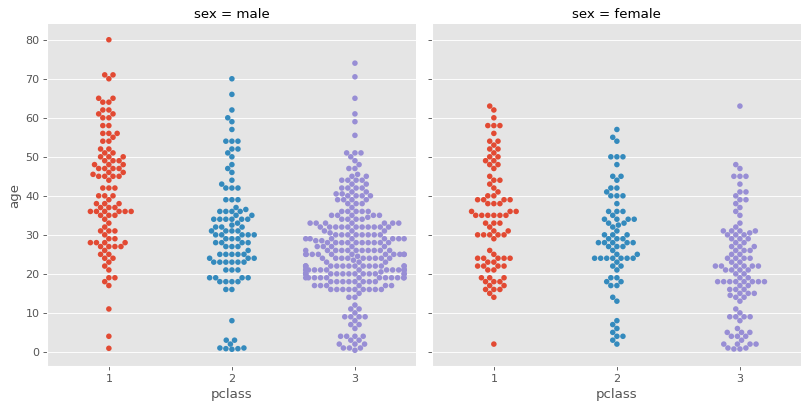

In [57]:
sns.catplot(x = 'pclass', y = 'age', kind = 'swarm', data = titanic, col = 'sex');

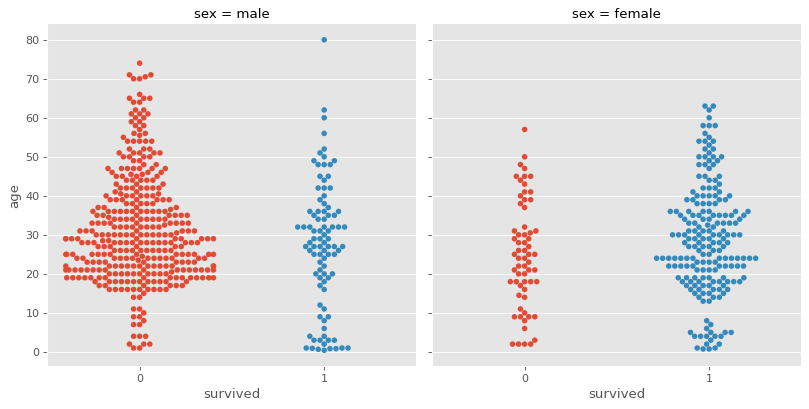

In [58]:
sns.catplot(x = 'survived', y = 'age', data = titanic, kind = 'swarm', col = 'sex');

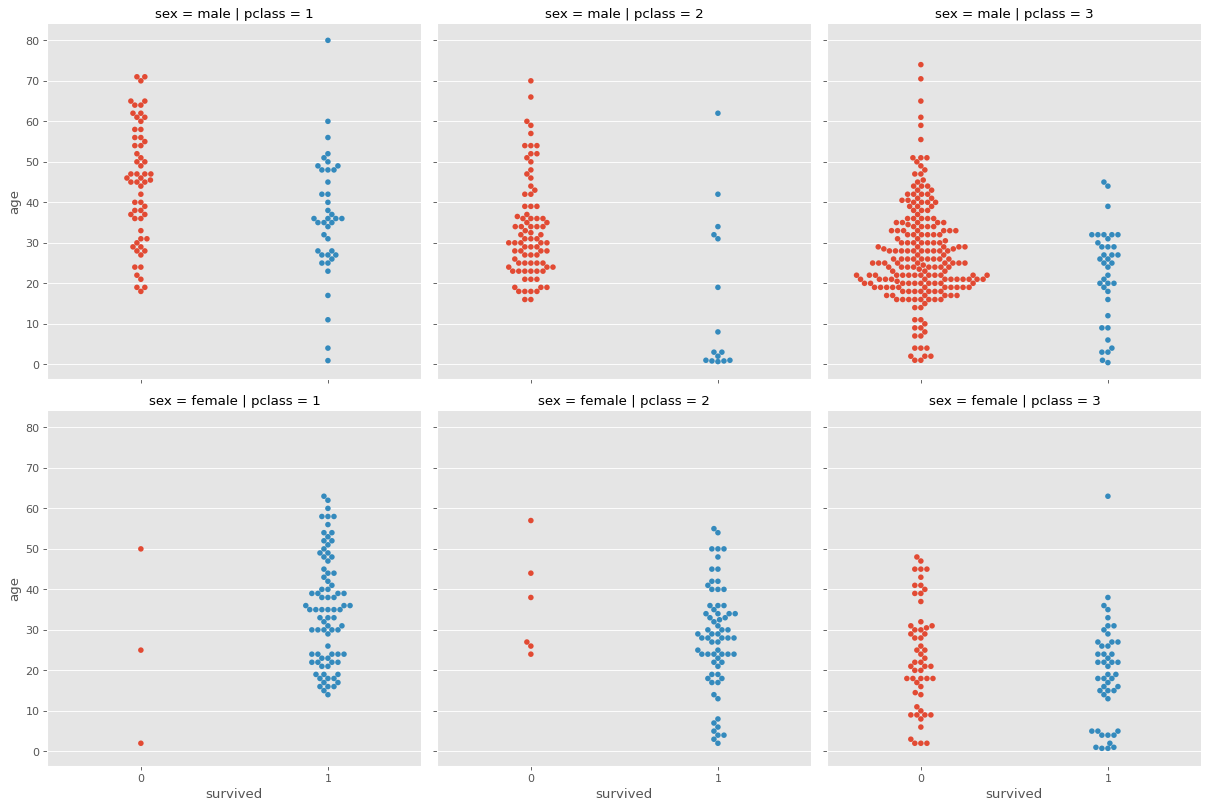

In [59]:
sns.catplot(x = 'survived', y = 'age', data = titanic, kind = 'swarm', row = 'sex', col = 'pclass');

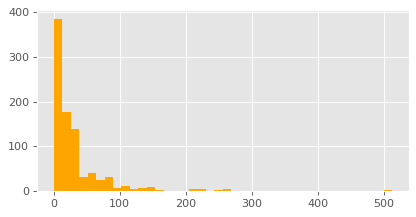

In [60]:
titanic['fare'].hist(bins = 40, color = 'orange');

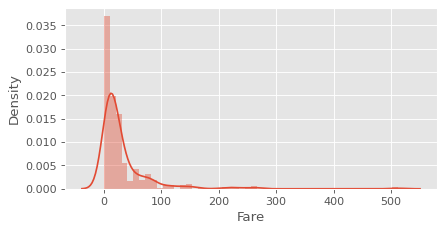

In [61]:
sns.distplot(titanic['fare'])
plt.xlabel('Fare')
plt.show()

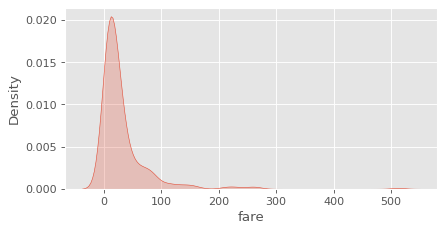

In [62]:
sns.kdeplot(titanic['fare'], shade = True);

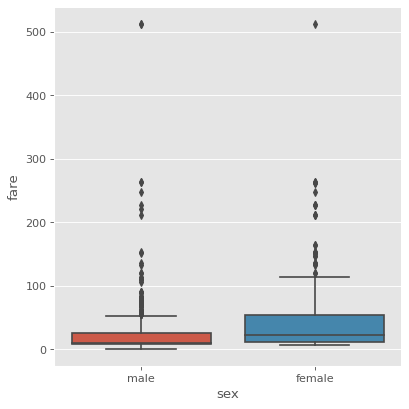

In [63]:
sns.catplot(x = 'sex', y = 'fare', data = titanic, kind = 'box');

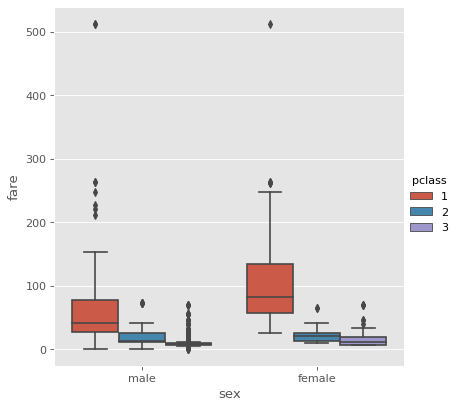

In [64]:
sns.catplot(x = 'sex', y = 'fare', data = titanic, kind = 'box', hue = 'pclass');

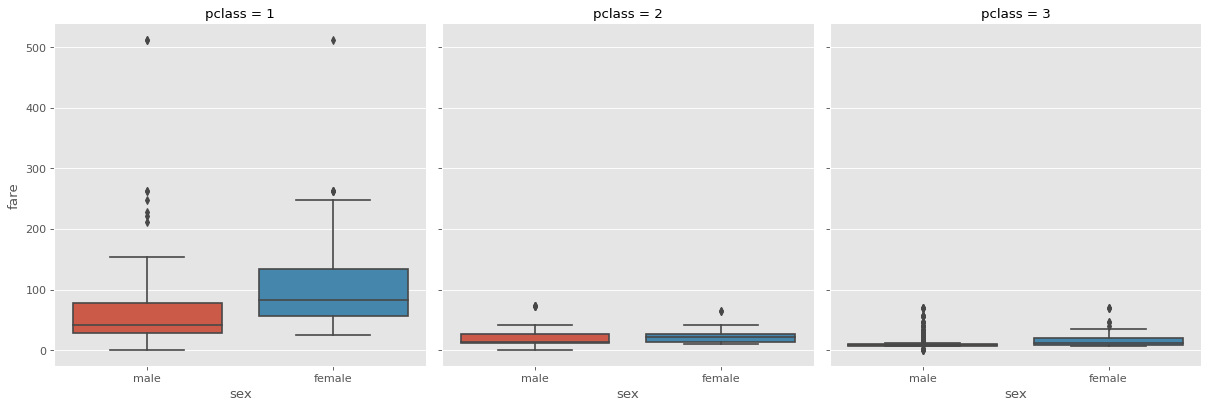

In [65]:
sns.catplot(x = 'sex', y = 'fare', data = titanic, kind = 'box', col = 'pclass');

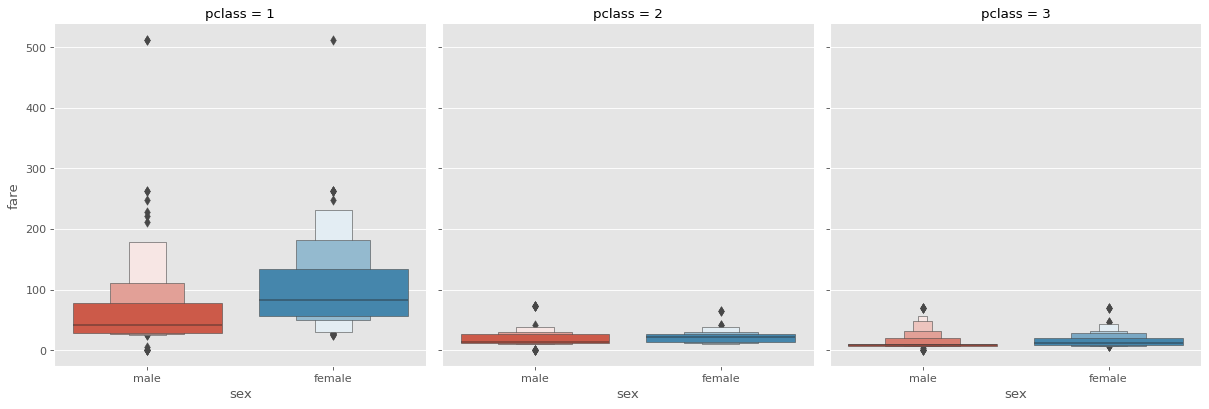

In [66]:
sns.catplot(x = 'sex', y = 'fare', data = titanic, kind = 'boxen', col = 'pclass');

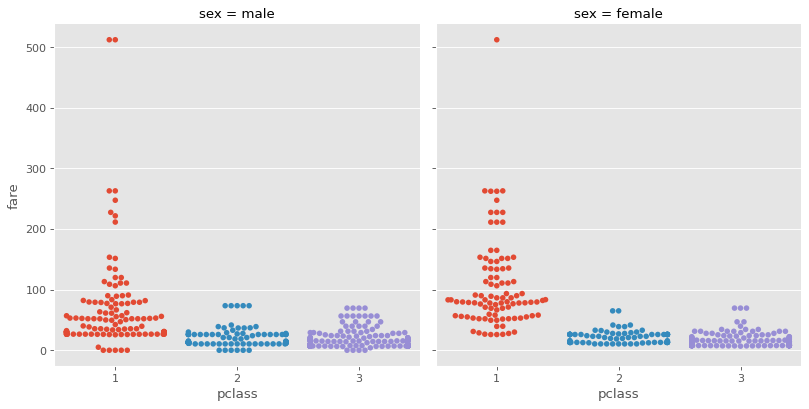

In [67]:
sns.catplot(x = 'pclass', y = 'fare', data = titanic, kind = 'swarm', col = 'sex');

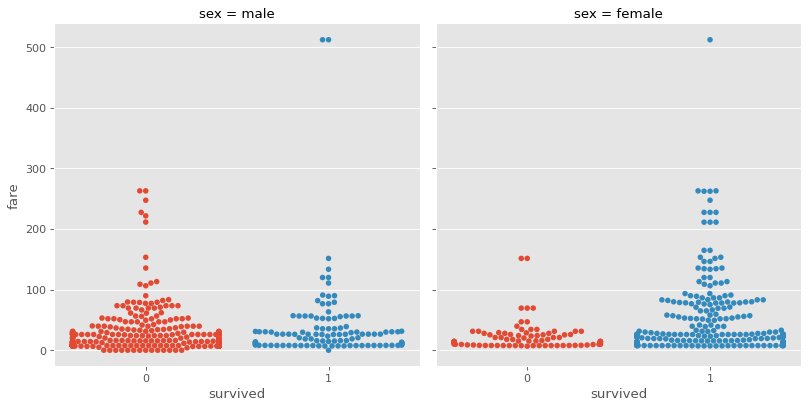

In [68]:
sns.catplot(x = 'survived', y = 'fare', data = titanic, kind = 'swarm', col = 'sex');

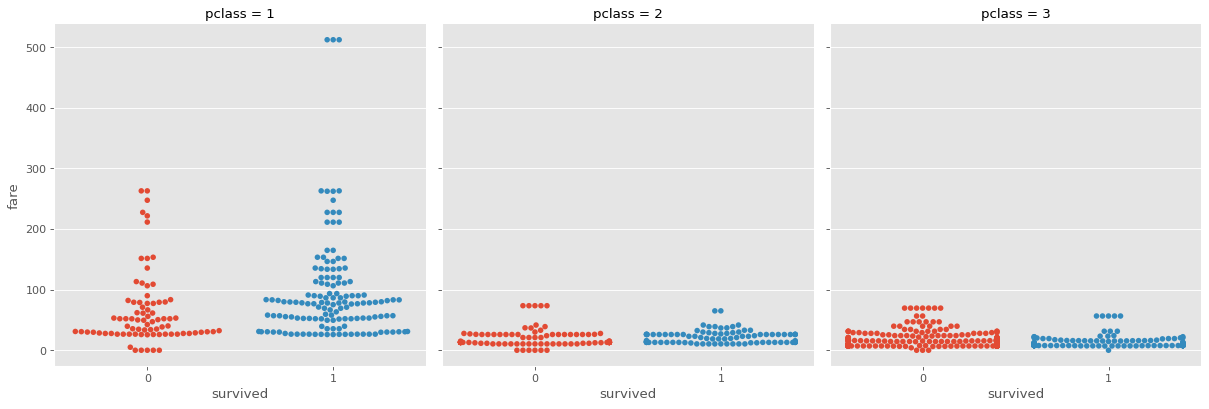

In [69]:
sns.catplot(x = 'survived', y = 'fare', data = titanic, kind = 'swarm', col = 'pclass');

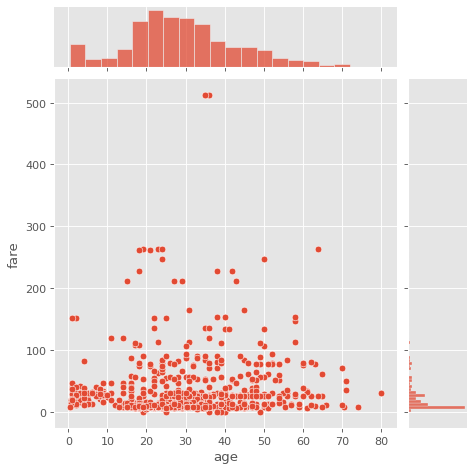

In [70]:
sns.jointplot(x = 'age', y = 'fare', data = titanic);

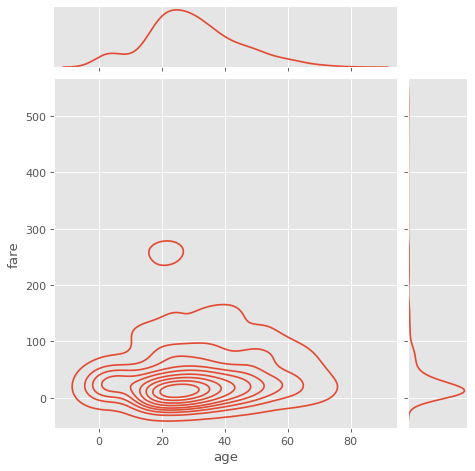

In [71]:
sns.jointplot(x = 'age', y = 'fare', data = titanic, kind = 'kde');

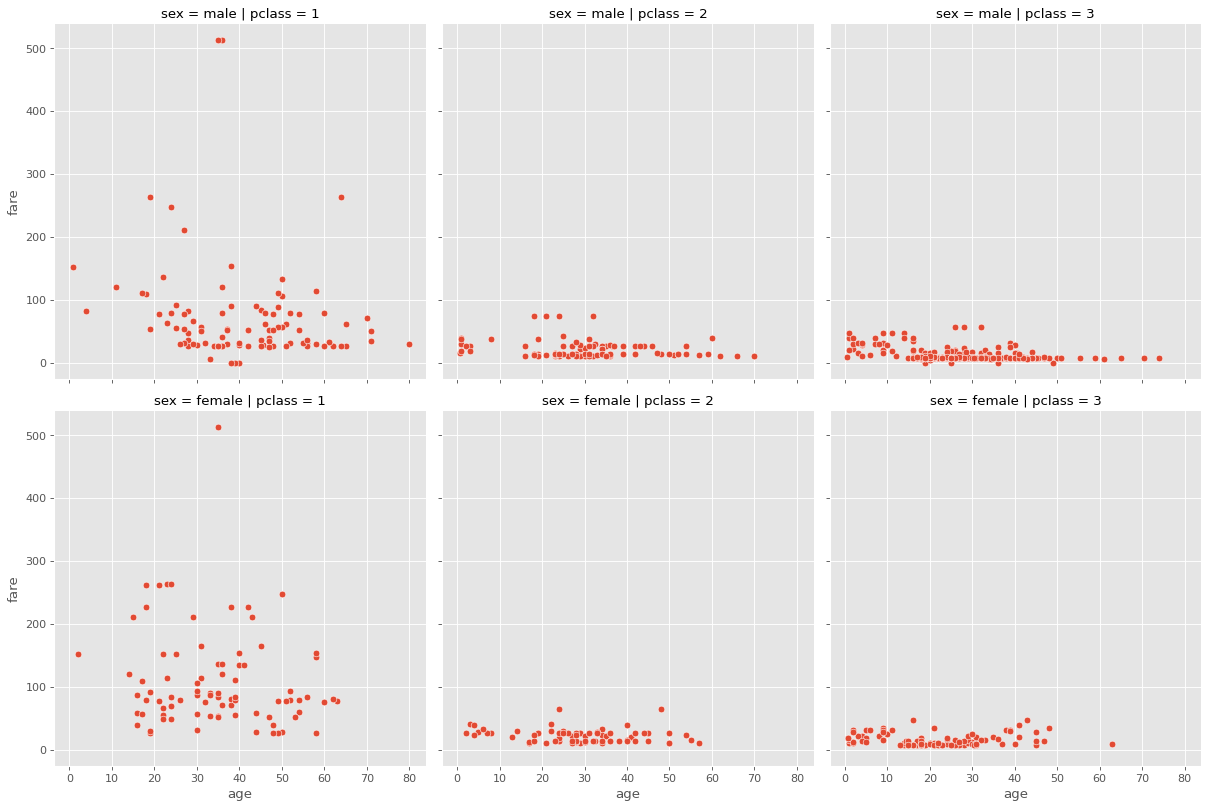

In [72]:
sns.relplot(x = 'age', y = 'fare', data = titanic, row = 'sex', col = 'pclass');

In [73]:
titanic['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

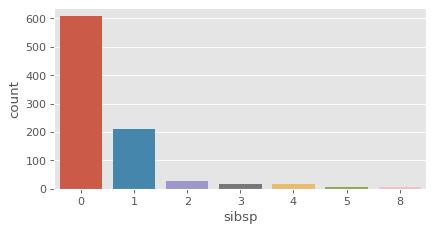

In [74]:
sns.countplot('sibsp', data = titanic);

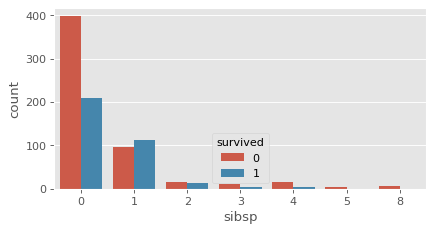

In [75]:
sns.countplot('sibsp', data = titanic, hue = 'survived');

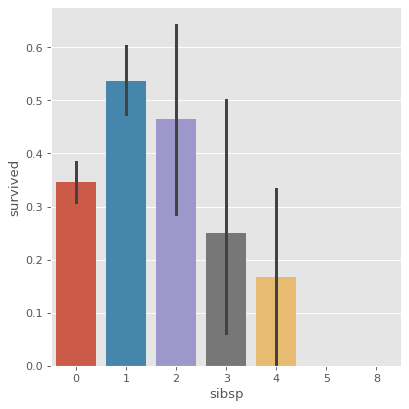

In [76]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic);

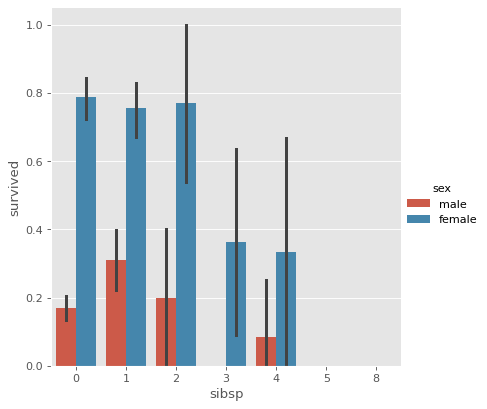

In [77]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic, hue = 'sex');

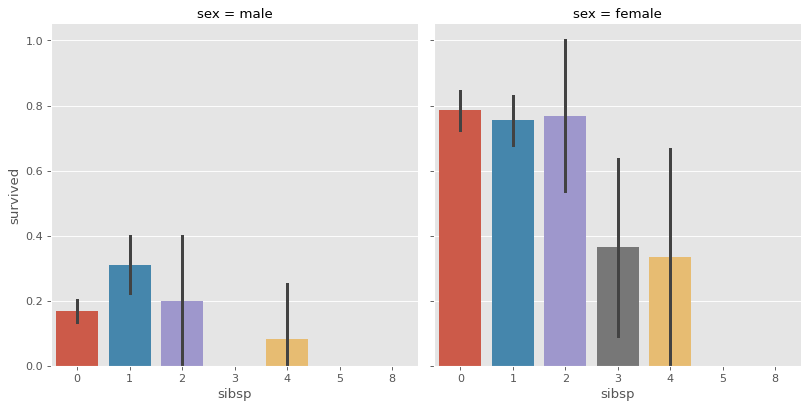

In [78]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic, col = 'sex');

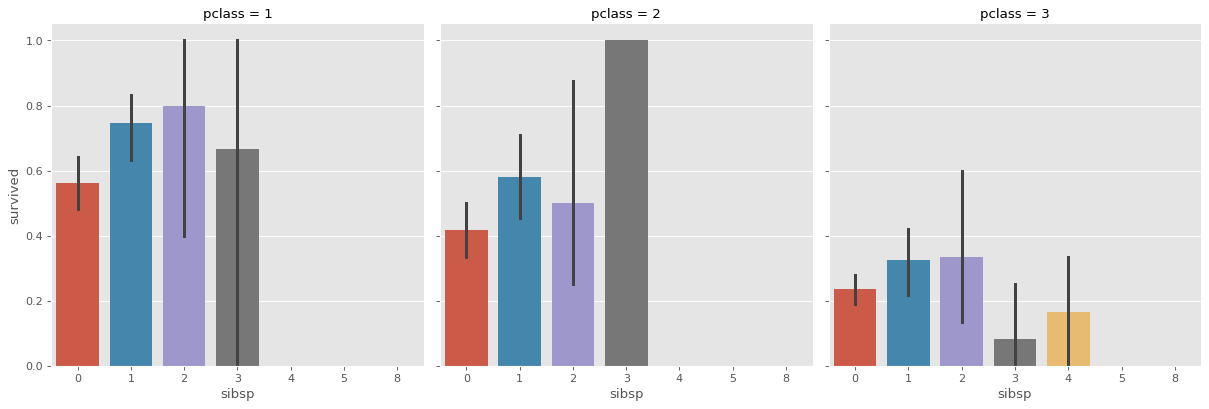

In [79]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic, col = 'pclass');

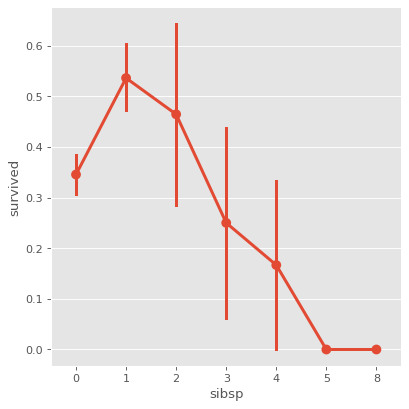

In [80]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'point', data = titanic);

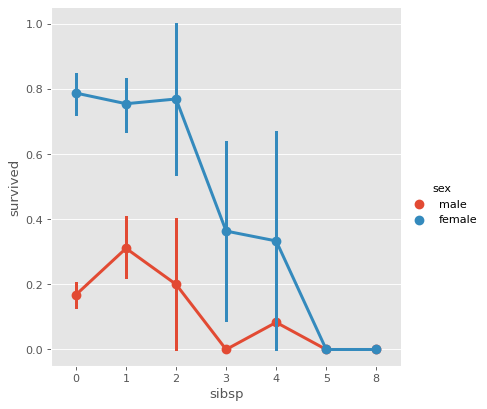

In [81]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'point', data = titanic, hue = 'sex');

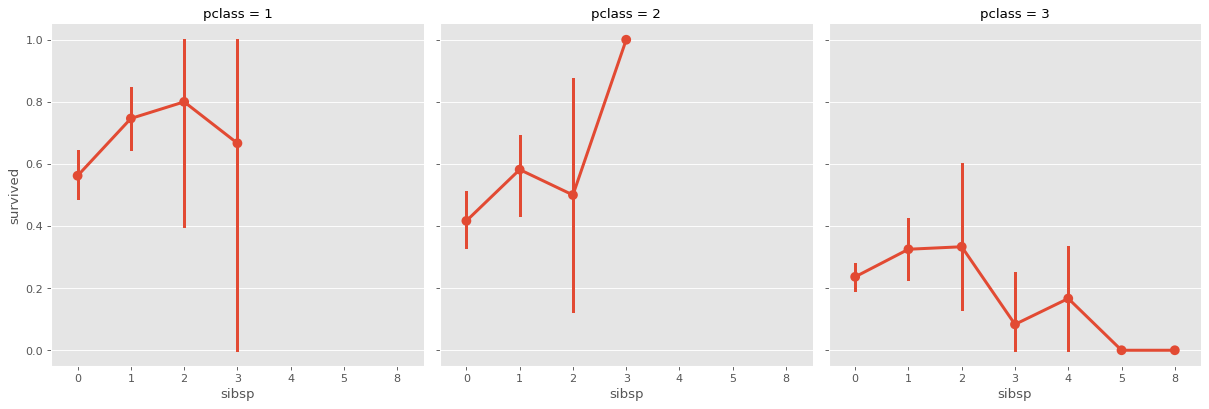

In [82]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'point', data = titanic, col = 'pclass');

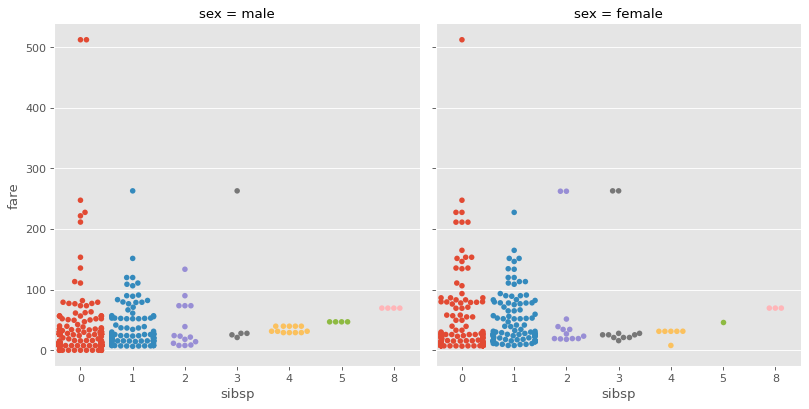

In [83]:
sns.catplot(x = 'sibsp', y = 'fare', data = titanic, kind = 'swarm', col = 'sex');

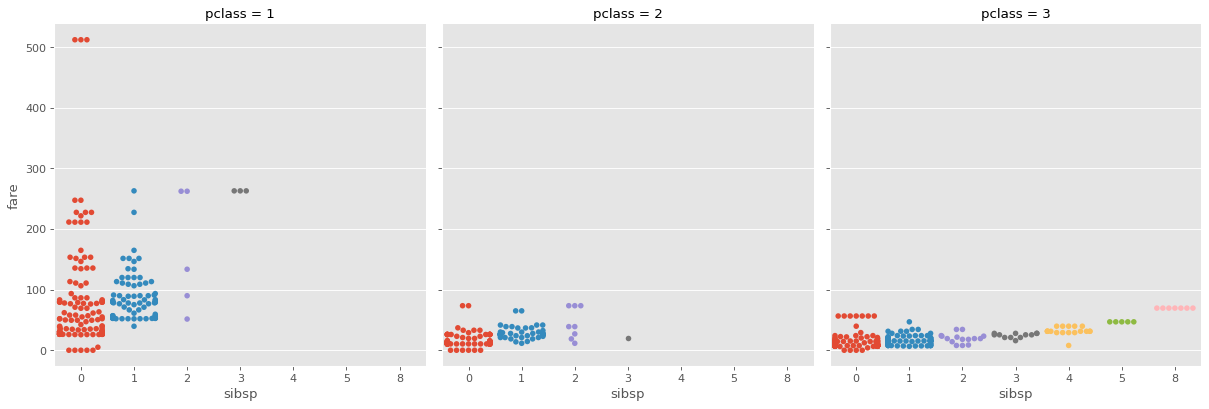

In [84]:
sns.catplot(x = 'sibsp', y = 'fare', data = titanic, kind = 'swarm', col = 'pclass');

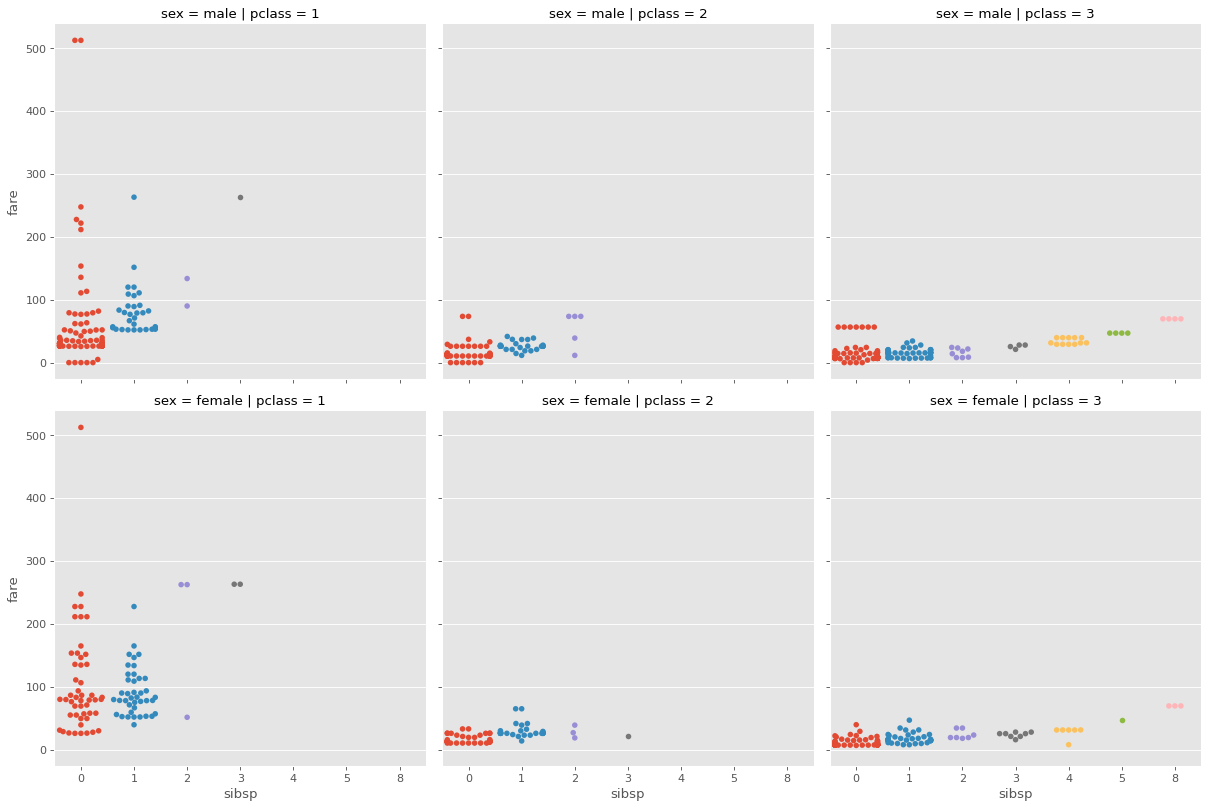

In [85]:
sns.catplot(x = 'sibsp', y = 'fare', data = titanic, kind = 'swarm', col = 'pclass', row = 'sex');

In [86]:
titanic['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

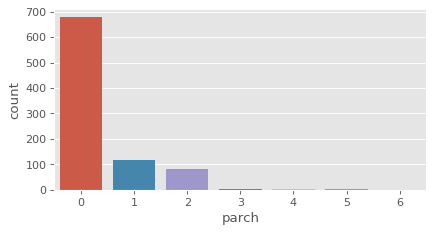

In [87]:
sns.countplot('parch', data = titanic);

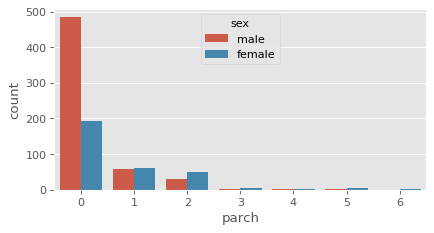

In [88]:
sns.countplot('parch', data = titanic, hue = 'sex');

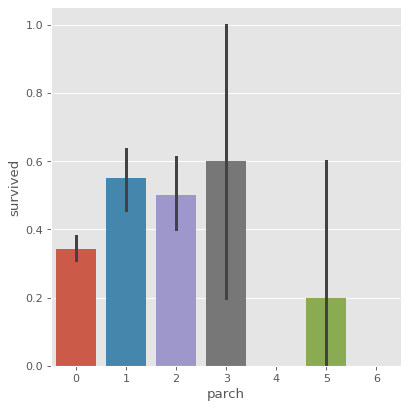

In [89]:
sns.catplot(x = 'parch', y = 'survived', data = titanic, kind = 'bar');

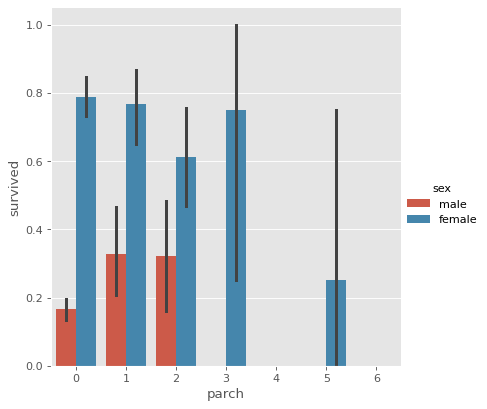

In [90]:
sns.catplot(x = 'parch', y = 'survived', data = titanic, kind = 'bar', hue = 'sex');

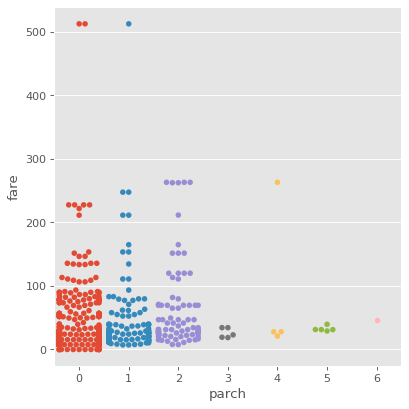

In [91]:
sns.catplot(x = 'parch', y = 'fare', data = titanic, kind = 'swarm');

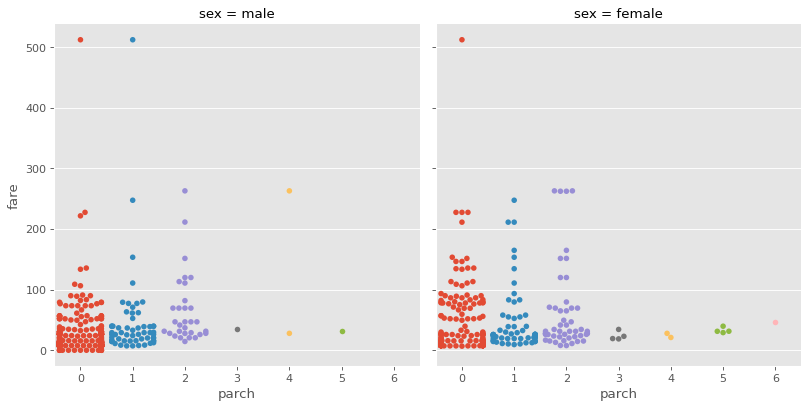

In [92]:
sns.catplot(x = 'parch', y = 'fare', data = titanic, kind = 'swarm', col = 'sex');

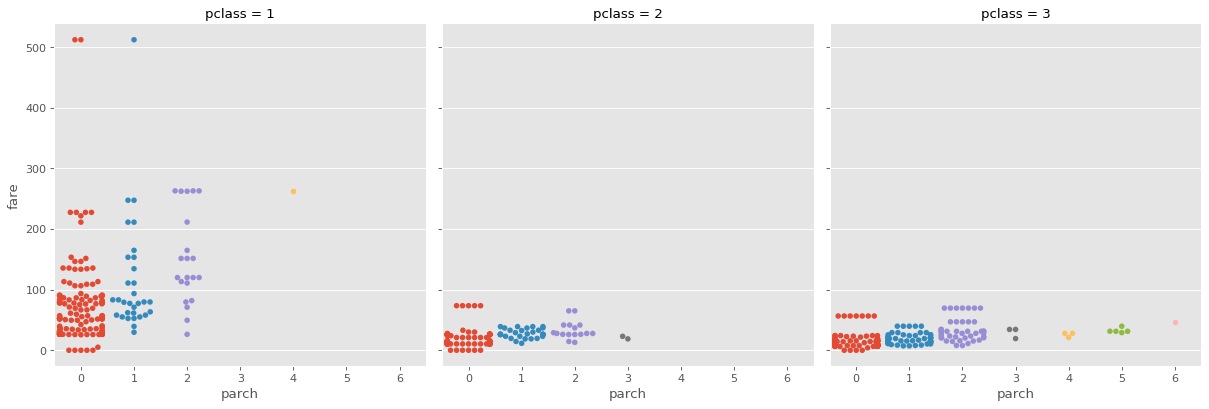

In [93]:
sns.catplot(x = 'parch', y = 'fare', data = titanic, kind = 'swarm', col = 'pclass');

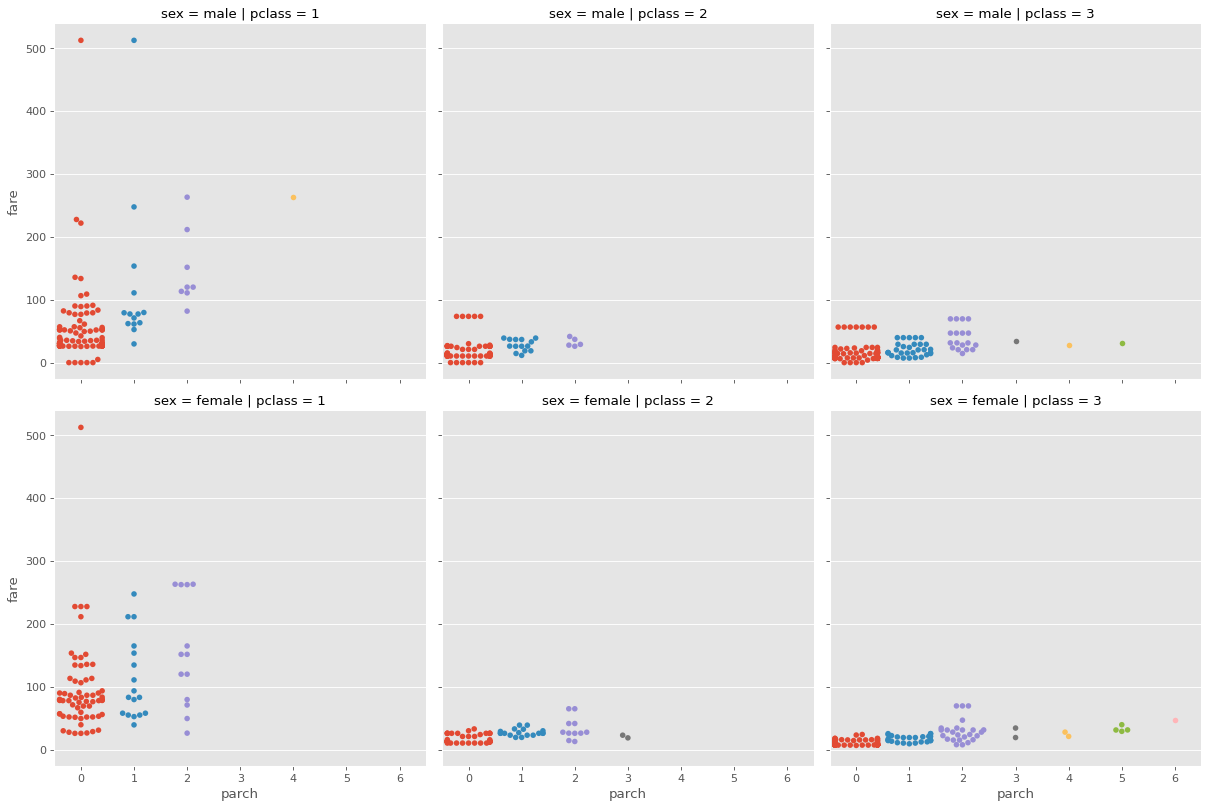

In [94]:
sns.catplot(x = 'parch', y = 'fare', data = titanic, kind = 'swarm', col = 'pclass', row = 'sex');

In [95]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

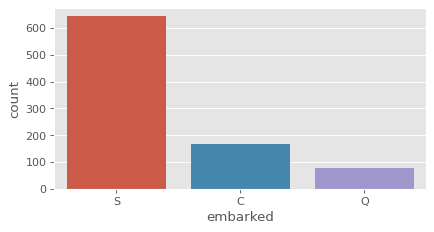

In [96]:
sns.countplot('embarked', data = titanic);

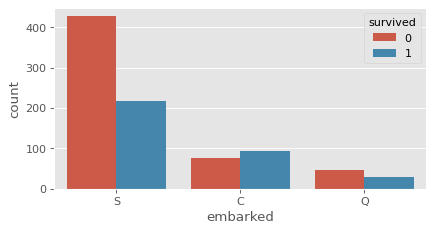

In [97]:
sns.countplot('embarked', data = titanic, hue = 'survived');

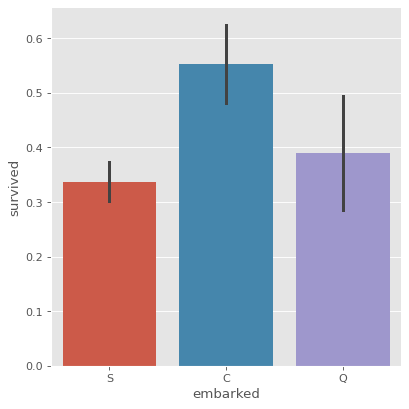

In [98]:
sns.catplot(x = 'embarked', y = 'survived', kind = 'bar', data = titanic);

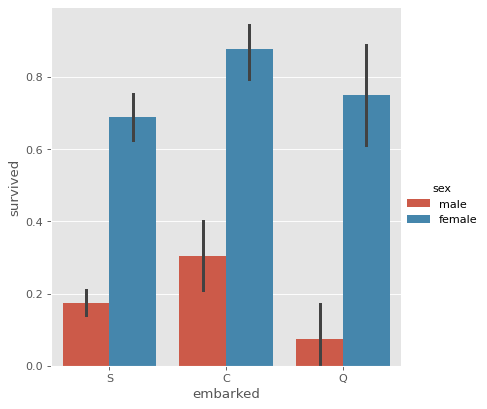

In [99]:
sns.catplot(x = 'embarked', y = 'survived', kind = 'bar', data = titanic, hue = 'sex');

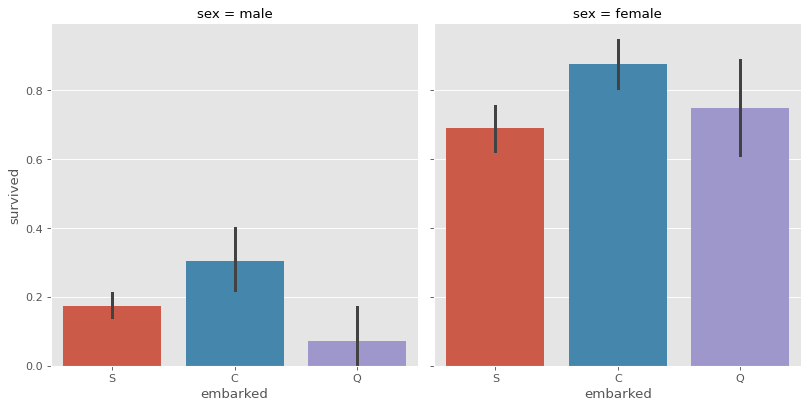

In [100]:
sns.catplot(x = 'embarked', y = 'survived', kind = 'bar', data = titanic, col = 'sex');

In [101]:
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [102]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

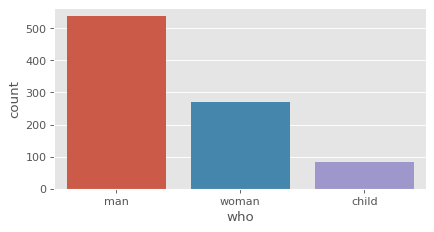

In [103]:
sns.countplot('who', data = titanic);

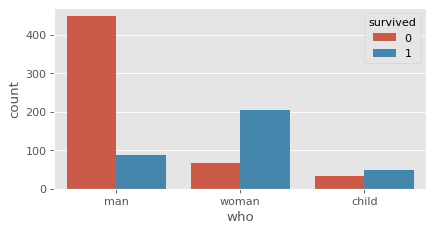

In [104]:
sns.countplot('who', data = titanic, hue = 'survived');

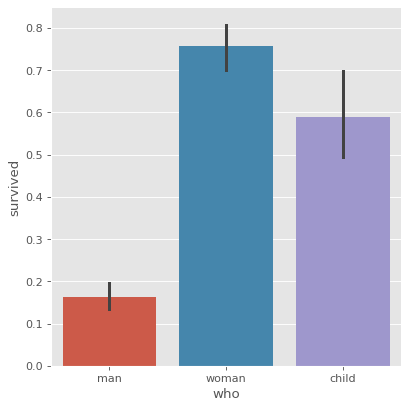

In [105]:
sns.catplot(x = 'who', y = 'survived', kind = 'bar', data = titanic);

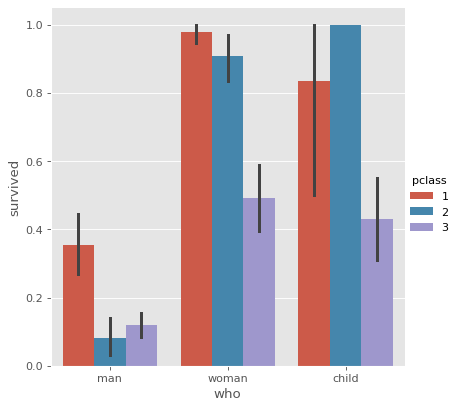

In [106]:
sns.catplot(x = 'who', y = 'survived', kind = 'bar', data = titanic, hue = 'pclass');

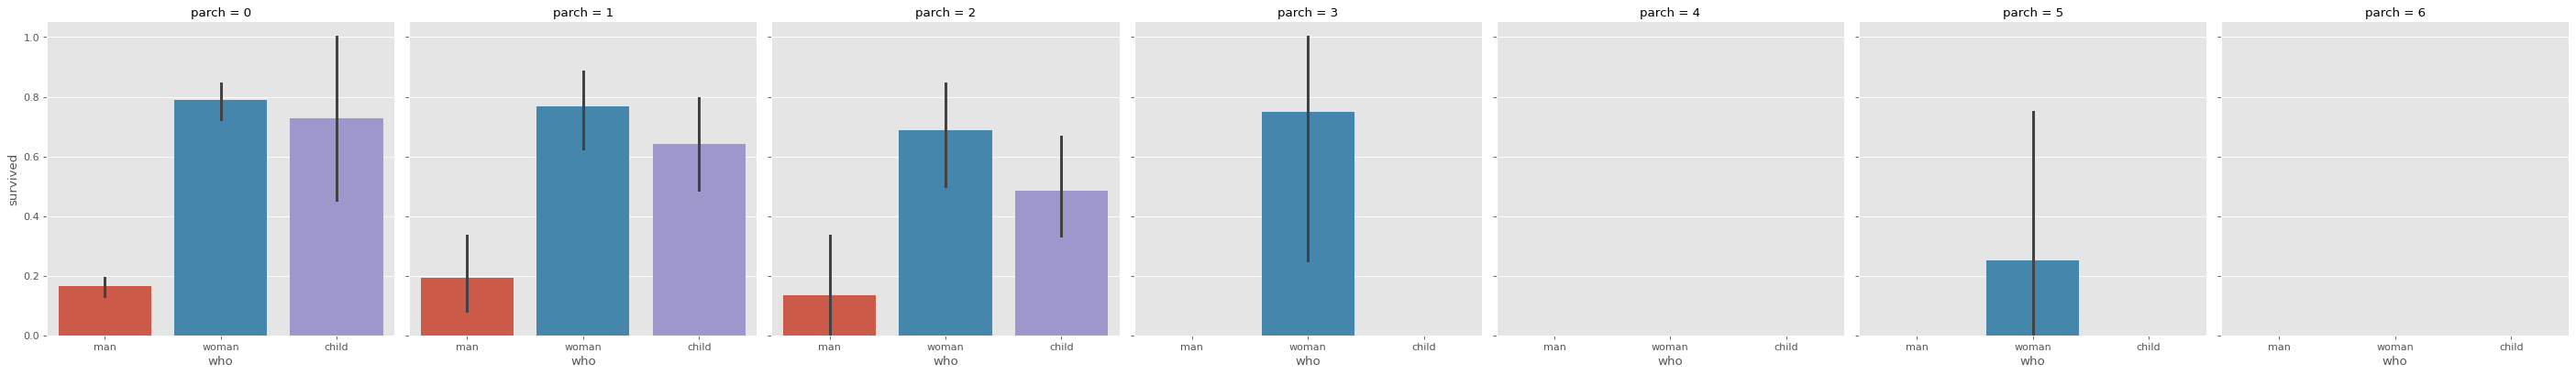

In [107]:
sns.catplot(x = 'who', y = 'survived', kind = 'bar', data = titanic, col = 'parch');

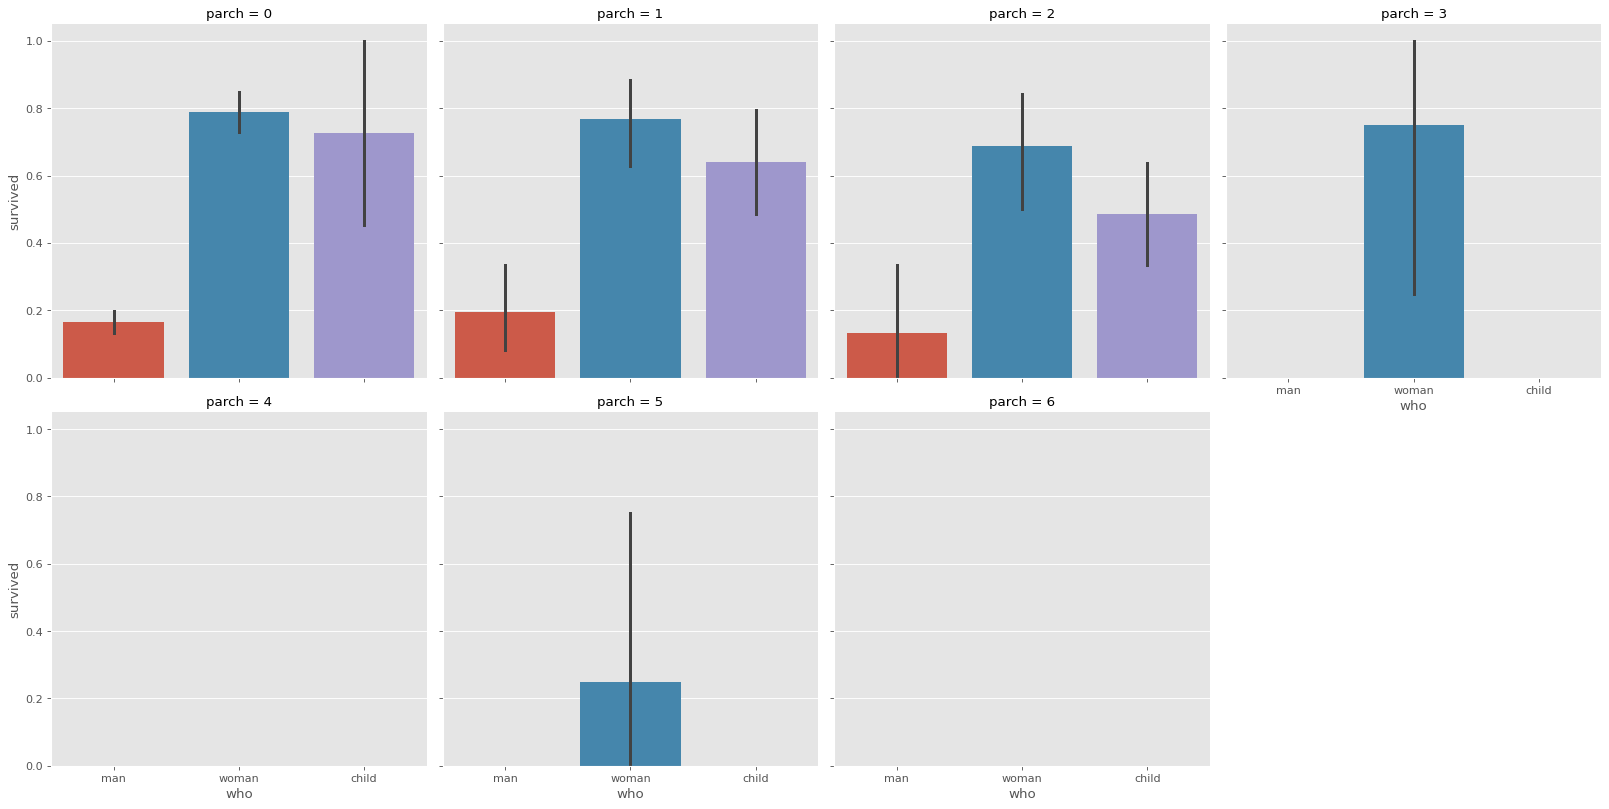

In [108]:
sns.catplot(x = 'who', y = 'survived', kind = 'bar', data = titanic, col = 'parch', col_wrap=4);